In [1]:
import numpy as np
import pandas as pd
import glob
import os
import sys
import calendar
import datetime
import time
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

In [109]:
df=pd.read_csv('subway_merge_1.csv', encoding = 'utf-8')
data=pd.read_csv("Cloud&UV08-17 danger25.csv", engine='python', header=0).dropna()
data2=pd.read_csv("highway.csv", engine='python', header=0)
data3=pd.read_csv("THSeoulCrime.csv", engine='python', header=0)

In [134]:
date=list(df.iloc[:,0])
datelist=[]
datelist2=[]
for i in range(len(df)):
    date2=str(date[i])
    year=date2[:4]
    month=date2[4:6]
    day=date2[6:8]
    da=datetime.date(int(year),int(month),int(day)).isocalendar()[1:]
    da2=datetime.date(int(year),int(month),int(day)).isocalendar()
    datelist.append(da)
    datelist2.append(da2)
datelist
df["주차요일"] = datelist
df["년주차요일"] = datelist2
df["혼잡도"] = (df["승차총승객수"] + df["하차총승객수"])//1000
#df["승하차총승객수"] = df["승차총승객수"] + df["하차총승객수"]
df.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,주차요일,년주차요일,승하차총승객수,혼잡도
0,20150101,목,2호선,236,영등포구청,6199,6219,20151217,"(1, 4)","(2015, 1, 4)",12418,12
1,20150101,목,2호선,237,당산,7982,8946,20151217,"(1, 4)","(2015, 1, 4)",16928,16
2,20150101,목,2호선,238,합정,17406,15241,20151217,"(1, 4)","(2015, 1, 4)",32647,32
3,20150101,목,2호선,239,홍대입구,57469,51756,20151217,"(1, 4)","(2015, 1, 4)",109225,109
4,20150101,목,2호선,240,신촌,30115,27766,20151217,"(1, 4)","(2015, 1, 4)",57881,57


In [136]:
sums=df["혼잡도"].groupby([df["년주차요일"],df["주차요일"],df["역명"]]).sum()
sums2=sums.reset_index(name="혼잡도").reindex(columns=["년주차요일","주차요일","역명","혼잡도"])
date3=pd.DataFrame(sums2)
means=date3["혼잡도"].groupby([date3["주차요일"],date3["역명"]]).mean()
means2=means.reset_index(name="혼잡도").reindex(columns=["주차요일","역명","혼잡도"])
obj=pd.DataFrame(means2)
obj2=obj.sort_values(by=['주차요일','혼잡도'], ascending=[True, False])
obj2.head()

,주차요일,역명,혼잡도
11,"(1, 1)",강남,191.25
415,"(1, 1)",잠실(송파구청),186.25
498,"(1, 1)",홍대입구,178.00
33,"(1, 1)",고속터미널,174.50
247,"(1, 1)",서울역,165.75


In [112]:
x=data.iloc[:,:3]
y=data.iloc[:,-1:].values.reshape(-1,1)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

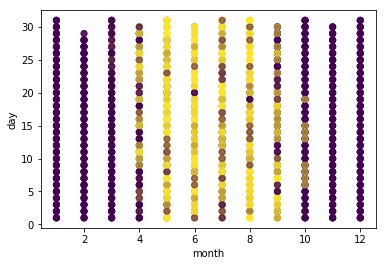

In [113]:
x1=data.values[:,:2]
y1=data.values[:,-1:]
plt.figure()
plt.ylabel("day")
plt.xlabel("month")
plt.scatter(data['월'],data['일'],c=data['자외선위험'],alpha=0.5)
plt.show()

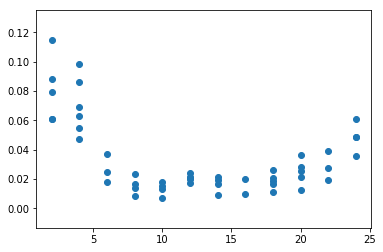

In [114]:
x2_1=data2['time'].values.reshape(-1,1)
y2_1=data2['hacc.ratio'].values.reshape(-1,1)
xtrain2_1,xtest2_1,ytrain2_1,ytest2_1=train_test_split(x2_1,y2_1,test_size=0.3,random_state=0)
plt.scatter(xtrain2_1,ytrain2_1)
plt.show()

In [115]:
x2=data2.iloc[:,:1]
y2=data2.iloc[:,-1:].values.reshape(-1,1)
xtrain2,xtest2,ytrain2,ytest2=train_test_split(x2,y2,test_size=0.3,random_state=0)

In [116]:
x3=data3['Month'].values.reshape(-1,1)
y3=data3['Crime.occur'].values.reshape(-1,1)
xtrain3,xtest3,ytrain3,ytest3=train_test_split(x3,y3,test_size=0.3,random_state=0)

In [148]:
y=int(input("년도:"))
m=int(input("월:"))
d=int(input("일:"))
h=int(input("시간:"))
today=datetime.date(y,m,d).isocalendar()[1:]
np.where(obj2["주차요일"] == today)
select_indices = list(np.where(obj2["주차요일"] == today)[0])
top20=obj2.iloc[select_indices]
SUBWAY_Congestion=top20.head(20)

K=3
KNN=KNeighborsClassifier(K, weights='distance')
KNN.fit(xtrain,ytrain)
KResult=KNN.predict(xtest)
Accuracy=metrics.accuracy_score(ytest,KResult)
KResult_1=KNN.predict([[m,d,0]])

KNN.fit(xtrain2,ytrain2)
KResult2=KNN.predict(xtest2)
Accuracy2=metrics.accuracy_score(ytest2,KResult2)
KResult2_2=KNN.predict([[h]])

KNN.fit(xtrain3,ytrain3)
KResult3=KNN.predict(xtest3)
Accuracy3=metrics.accuracy_score(ytest3,KResult3)
KResult3_2=KNN.predict([[m]])
print(KResult_1, Accuracy)
print(KResult2_2, Accuracy2)
print(KResult3_2, Accuracy3)
SUBWAY_Congestion

년도:2019
월:2
일:8
시간:12
['Normal'] 0.8706467661691543
['Normal'] 0.8636363636363636
['Normal'] 0.7727272727272727


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


,주차요일,역명,혼잡도
19940,"(6, 5)",강남,262.0
20344,"(6, 5)",잠실(송파구청),211.8
19962,"(6, 5)",고속터미널,208.4
20427,"(6, 5)",홍대입구,201.6
20176,"(6, 5)",서울역,200.0
20143,"(6, 5)",사당,166.0
20184,"(6, 5)",선릉,160.4
20231,"(6, 5)",신림,158.6
19980,"(6, 5)",구로디지털단지,150.4
19932,"(6, 5)",가산디지털단지,144.2
